### This example shows how to plot choropleth maps (on state level and county level).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import plot_utils as pu

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline

### Read raw data (USA population density per state and county) and process raw data

In [5]:
filename = './datasets/DEC_10_SF1_GCTPH1.US05PR_with_ann.csv'

In [6]:
d0 = pd.read_csv(filename,header=1,dtype={'Target Geo Id2':str},encoding='latin1')  # read raw data
USA_avg = d0.iloc[0,-2]  # national average population density
d1 = d0.iloc[1:,[4,-2]]  # only extract useful columns
d1.columns = ['FIPS_code','pop_density']  # rename columns

Extract population density per state and per county

In [7]:
state_data  = d1.iloc[np.where(np.array(d1['FIPS_code'].astype(float)) <= 100)[0]]
county_data = d1.iloc[np.where(np.array(d1['FIPS_code'].astype(float)) >  100)[0]]
state_data = state_data.iloc[:-1,:].set_index('FIPS_code') # exclude Puerto Rico
county_data = county_data.loc[2:3194,:]  # exclude Puerto Rico

Take a look at the state-level population density:

In [8]:
state_data.head(5)  # two-digit FIPS codes are unique state identifiers (e.g., '01': Alabama, '02': Alaska)

,pop_density
FIPS_code,
01,94.4
02,1.2
04,56.3
05,56.0
06,239.1


In [9]:
county_data.head(5)  # five-digit FIPS codes are unique county identifiers (e.g., '01001': Autauga County, AL)

,FIPS_code,pop_density
2,01001,91.8
3,01003,114.6
4,01005,31.0
5,01007,36.8
6,01009,88.9


### Plot population density per state

For demonstration purposes, remove data of three states:

In [10]:
state_data_dropped = state_data.drop(['20','45','56'])  # drop some states on purpose

Plot choropleth map by state, with missing states shown as hash lines.

In [11]:
import os
os.environ['PROJ_LIB'] = "/Users/jian/anaconda3/pkgs/pyproj-3.3.0-py39heccf640_0"

Kansas data missing (replaced with NaN).
South Carolina data missing (replaced with NaN).
Wyoming data missing (replaced with NaN).


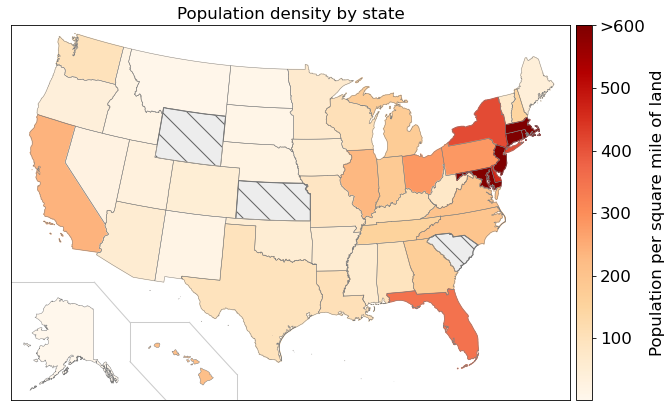

In [12]:
pu.choropleth_map_state(
    state_data_dropped,
    map_title='Population density by state',
    unit='Population per square mile of land',
    vmax=600, dpi=75, fontsize=16,
);

### Plot population density per county

The `cmap` argument can take a string name (from https://matplotlib.org/examples/color/colormaps_reference.html), or a generic matplotlib color map object (e.g., generated by `seaborn`).

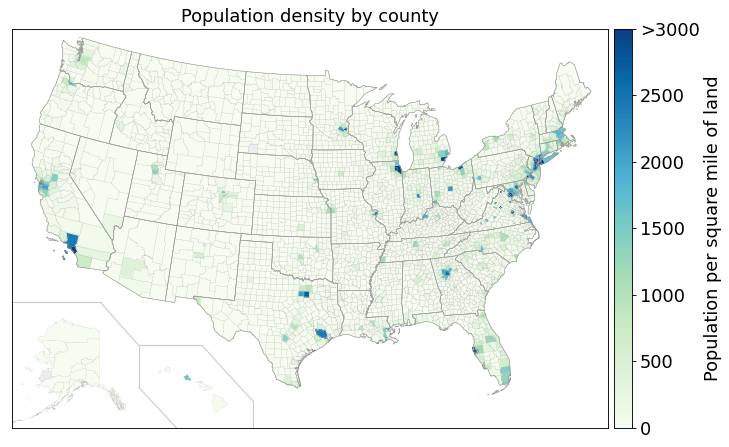

In [13]:
pu.choropleth_map_county(
    county_data,
    map_title='Population density by county',
    unit='Population per square mile of land',
    vmax=3000, dpi=80, fontsize=16,cmap='GnBu',
);

### Population density difference compared to national average

For this type of "deviation choropleth map", the user is recommended to set the colormap to diverging colormaps such as `RdYlBu`. And the user can also manually specify the diverging point (the `cmap_midpoint` argument).

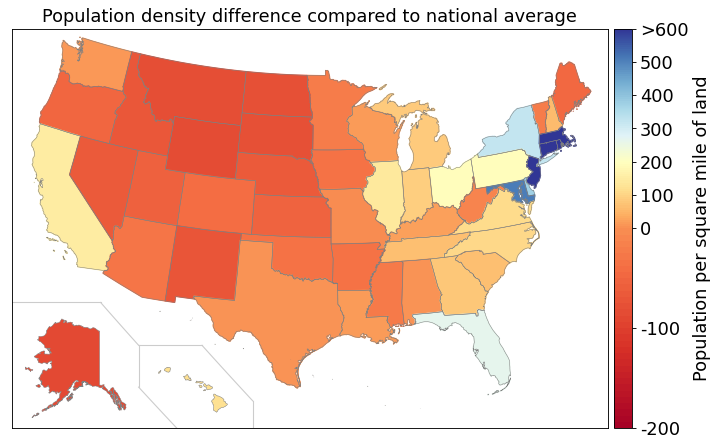

In [14]:
pu.choropleth_map_state(
    state_data - USA_avg,
    map_title='Population density difference compared to national average',
    unit='Population per square mile of land',
    vmax=600, vmin=-200, cmap='RdYlBu', cmap_midpoint=0, dpi=80, fontsize=16,
);

### Show maps as subplots

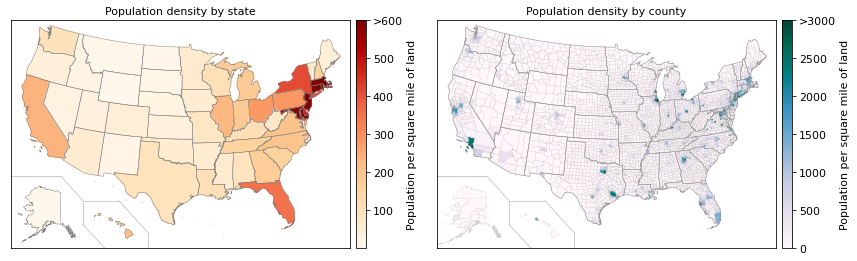

In [15]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(1,2,1)  # create a subplot axis: ax1
pu.choropleth_map_state(
    state_data, fig=fig, ax=ax1,  # pass figure and axes handles to the function
    fontsize=11, dpi=75,  vmax=600,
    map_title='Population density by state',
    unit='Population per square mile of land',
);

ax2 = fig.add_subplot(1,2,2)  # create another subplot axis: ax2
pu.choropleth_map_county(
    county_data, fig=fig, ax=ax2,  # pass figure and axes handles to the function
    vmax=3000, dpi=80, fontsize=11, cmap='PuBuGn',
    map_title='Population density by county',
    unit='Population per square mile of land',
);